# Implementazione di un classificatore con Logistic Regression

### 0) Importo le librerie necessarie

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, f1_score, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

### 1) Sigmoid o Logistic function
Per effettuare la classificazione serve una funzione con codominio [0,1]. Infatti la predizione si baserà sulla probabilità della stima di appartenere ad una o all'altra classe

In [9]:
def logistic(z):
    den = 1 + np.exp(-z)
    sigm = 1.0/den
    return sigm

### 2) Funzione di ipotesi
Per approssimare una probabilità, la funzione di costo sarà basta sulla funzione logisitca

In [10]:
def hyp(W,X):
    param = np.dot(W,X.T)
    return logistic(param)

### 3) Funzione di costo
Da massimizzare nello step di ottimizzazione. IN particolare il logaritmo della funzione di coston

In [11]:
def cost(W,X,Y):
    m = X.shape[0]
    h = hyp(W,X)
    log_h = np.log(h)
    log_one_h = np.log(1-h)
    l_cost = float((-1.0/m) * ((np.dot(log_h,Y)) + (np.dot(log_one_h,(1-Y)))))
    return l_cost

### 4) Carico e preparo i dati

In [12]:
# Carico il dataset
path = '../color_extr/data.csv'
data = pd.read_csv(path, usecols = [i for i in range(5)])

# Creo train e test set
X_train, X_test, Y_train, Y_test = train_test_split(data[['presenza_foglie','assenza_foglie','presenza_bachi_sfondo','assenza_bachi_sfondo']], data[['classificazione']], test_size=0.13)

m_tr, n_tr = X_train.shape
X_train = np.concatenate((np.ones((m_tr,1)), X_train), axis=1)
n_tr +=1

m_te, n_te = X_test.shape
X_test = np.concatenate((np.ones((m_te,1)), X_test), axis=1)
n_te += 1

W = np.array(np.zeros((1,n_te)))
#W = np.matrix(np.random.randn((n_te)))

Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

# Normalizzo i dati
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

array([[0., 0., 0., 0., 0.]])

### 5) Fit dell'algoritmo con gradient ascent
Cerco il punto di massimo della funzione di costo per trovare i pesi ottimi

In [13]:
def gradient_ascent(X,W,Y,alpha,stop):
    m,n = X.shape
    cost_old = np.inf
    cost_new = cost(W,X,Y)
    print(cost_old - cost(W,X,Y))
    sum = 0
    iter = 0

    while(abs(cost_old-cost_new) > stop):
        for j in range(0,n):
            for i in range(0,m):
                sum += (Y[i][0] - hyp(W,X[i])) * X[i][j]
            W[0][j] = W[0][j] + (alpha/m) * sum
        cost_old = cost_new
        cost_new = cost(W,X,Y)
        print(cost_old - cost(W,X,Y))
        iter += 1

    return W, iter  

gradient_ascent(X_train,W,Y_train,0.04,0.000001)

inf
0.014193030908138948
0.013649186096397758
0.013127123338776192
0.012626447953332565
0.012146689585842418
0.011687315224192196
0.01124774139791529
0.010827345426500545
0.010425475632997672
0.010041460484550457
0.009674616658566615
0.00932425606237064
0.008989691856072568
0.008670243543736689
0.008365241207806462
0.008074028966979396
0.007795967739365417
0.007530437391589095
0.007276838351255255
0.007034592755588154
0.006803145203488792
0.006581963172243577
0.006370537153927047
0.006168380560415632
0.005975029440052071
0.005790042043467836
0.005612998270968617
0.005443499029237353
0.005281165520929332
0.005125638487018858
0.004976577418478567
0.00483365975100869
0.0046965800540523794
0.00456504922319062
0.004438793683183617
0.0043175546073732085
0.004201087157839234
0.004089159749615379
0.00398155334133754
0.0038780607539513623
0.003778486018473415
0.003682643753297632
0.0035903585711306585
0.0035014645153085278
0.0034158045249979563
0.0033332299285859235
0.0032535999644083824
0.0031

(array([[43.45871834, 39.73207529, 43.45729565, 48.04068705, 43.47193449]]),
 7557)

### 6) Model Assestement

In [23]:
def prediction(W,X,Y):
    m = X.shape[0]
    Y_hat = hyp(X, W) > 0.5 
    accuracy = 1.0/m * np.sum(Y == Y_hat)
    return accuracy, Y_hat

print("### MyLog:\n\tAccuracy of training: "+str(prediction(W,X_train,Y_train)[0])+"\n\tAccuracy of test: "+str(prediction(W,X_test,Y_test)[0]))
print("### MyLog:\n\tError rate of training: "+str(1 - prediction(W,X_train,Y_train)[0])+"\n\tError rate of test: "+str(1 - prediction(W,X_test,Y_test)[0]))

### MyLog:
	Accuracy of training: 0.9693617021276596
	Accuracy of test: 0.9715909090909092
### MyLog:
	Error rate of training: 0.030638297872340403
	Error rate of test: 0.02840909090909083


#### - Metrica errore

In [15]:
metric_error = len(data[data.classificazione == 0]) / len(data)
metric_accurancy = 1 - metric_error

(metric_error,metric_accurancy)

(0.44041450777202074, 0.5595854922279793)

#### - Confusion Matrix

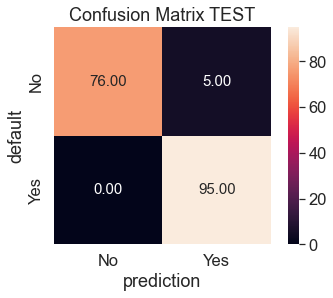

In [27]:
predictions = prediction(W,X_test,Y_test)[1]

cm = confusion_matrix(Y_test, predictions)
plt.figure()
sns.set(font_scale=1.5)
hm = sns.heatmap( cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=['No', 'Yes'], xticklabels=['No', 'Yes'])
plt.title('Confusion Matrix TEST')
plt.ylabel('default')
plt.xlabel('prediction')
plt.show()

#### - Precision e Recall Curve

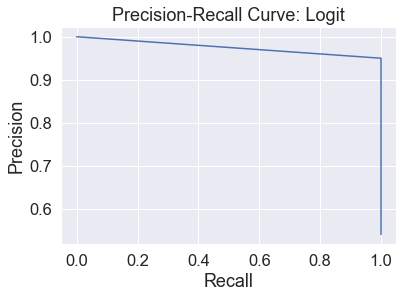

Precision:  0.95
Recall:  1.0
f1-score:  0.9743589743589743


In [28]:
precision, recall, thresholds = precision_recall_curve(Y_test, predictions)
plt.figure()
plt.plot(recall, precision)
plt.title("Precision-Recall Curve: Logit")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

print("Precision: ", precision[1])
print("Recall: ", recall[1])
print("f1-score: ", f1_score(Y_test, predictions))

#### - ROC e AUC curve

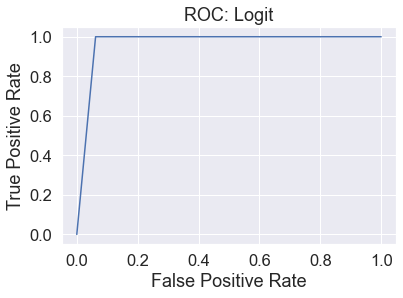

AUC:  0.9691358024691358


In [31]:
fpr, tpr, thresholds = roc_curve(Y_test, predictions)
plt.figure()
plt.plot(fpr, tpr)
plt.title("ROC: Logit")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print ("AUC: ", roc_auc_score(Y_test, predictions))